# Wrangle Act

## Table of Contents

1. Gather data
2. [](Assess)<a href='#Assess'>Assess</a>
3. [](Clean)<a href='#Clean'>Clean</a>
4. [](Tidiness)<a href='#Tidiness'>Tidiness</a>
5. [](Store)<a href='#Store'>Store</a>
6. [](Analyze)<a href='#Analyze'>Analyze</a>
7. [](Report)<a href='#Report'>Report</a>



# GATHER



In [129]:
# I used the Mentor Help section for the .txt Twitter file.  

import pandas as pd
import numpy as np
import json
from timeit import default_timer as timer
import tweepy
from tweepy import OAuthHandler


df = pd.read_csv('twitter-archive-enhanced.csv')


In [130]:
# Check import of 'twitter-archive-enhanced'
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [131]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [132]:
# Show duplicated tweet id's in 'twitter-archive-enhanced'
df_dup_rows = df[df.duplicated(['tweet_id'])]
df_dup_rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [133]:
df.query('rating_numerator').tweet_id.max()

892420643555336193

In [134]:
df['in_reply_to_status_id'].sort_values()


1914    6.658147e+17
2298    6.670655e+17
1339    6.671522e+17
149     6.671522e+17
2169    6.678065e+17
2189    6.689207e+17
2149    6.693544e+17
1464    6.706684e+17
2038    6.715449e+17
2036    6.715610e+17
1885    6.717299e+17
1940    6.737159e+17
1905    6.744689e+17
1895    6.747400e+17
1892    6.747522e+17
1882    6.747934e+17
1866    6.749998e+17
1452    6.753494e+17
1852    6.754971e+17
1842    6.757073e+17
1844    6.758457e+17
1819    6.765883e+17
1774    6.780211e+17
1689    6.813394e+17
1663    6.827884e+17
1634    6.842229e+17
1630    6.844811e+17
1618    6.849598e+17
1605    6.855479e+17
1598    6.860340e+17
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [136]:
# import tsv file (I used this video or assistance: https://www.youtube.com/watch?v=cWkwV5c5I38)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url_df = pd.read_table(url, sep='\t')
url_df.head()

# Save html to file #(helper = https://cmdlinetips.com/2020/03/save-a-pandas-data-frame-as-csv-file/)
url_df.to_csv('weratedogs-image-predictions.tsv', sep='\t')


In [137]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [138]:
url_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [139]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [140]:
# Twitter denied me developer access. I used the Udacity Mentor Help section to complete this code
# File was corrupted / unusable upon creation, ultimately downloaded from Udacity

#consumer_key='@@@@'
#consumer_secret='@@@@'
#access_token='@@@@'
#access_secret='@@@@'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)    
#auth.set_access_token(access_token, access_secret)   

#api = tweepy.API(auth_handler=auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)




In [141]:
# Opening the file after running 
# Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
from pprint import pprint

tweets_list = []
with open('tweet-json.txt') as f:
    for line in f:
        temp_dict = {}
        status  = json.loads(line)
        temp_dict["tweet_id"] = status['id']
        temp_dict["retweet_count"] = status['retweet_count']
        temp_dict["favorite_count"] = status['favorite_count']
        tweets_list.append(temp_dict)
        
df_tweets = pd.DataFrame(tweets_list)
df_tweets

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [142]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB





## Assess

### Quality Issues

List at least 8 quality issues with the three data files:

File 1 - Twitter-archive-enhanced.csv
- 1.1 - Several columns missing data ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls') 
- 1.2 - 'timestamp' and 'retweeted_status_timestamp' columns are objects, should be datetime 
- 1.3 - Investigate rating outliers by creating a rating column where the numerator is divided by the denominator
- 1.4 - Remove rows listed as replying to an original tweet as not being an original tweet and therefore should not be included in comparing ratings
- 1.5 - Drop the rows containing all zeros

File 2 - weratedogs-image-predictions.tsv


File 3 - json_tweets.txt


### Tidiness Issues

List at least 2 tidiness issues with the three data files:

File 1 - Twitter-archive-enhanced.csv
- 'Source' column needs to be stripped down to one distinct variable in a column to be called 'device'; drop 'source' column and keep new 'device' column
- Combine dog image columns doggo, floofer, pupper and puppo into one column so there is one variable for the stage of the dog

 
File 2 - weratedogs-image-predictions.tsv
- Add image data to 'Twitter-archive-enhanced' to add attributes for analysis

File 3 - json_tweets.txt
- Join json_tweets with 'Twitter-archive-enhanced' to add attributes for analysis

## Clean

In [143]:

#Create a copy of each file
df_archive_clean = df.copy()
url_img_df_clean = url_df.copy()
df_tweets_clean = df_tweets.copy()



In [144]:
# check copy for data
df_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [145]:
# Check copy for data
url_img_df_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [146]:
# Check copy for data

df_tweets_clean.head(3)


,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864


In [148]:
# 1.1 - I need these as integers for this part of my project
df_archive_clean['in_reply_to_status_id'] = df_archive_clean['in_reply_to_status_id'].fillna(value=0)
df_archive_clean['in_reply_to_status_id'] = df_archive_clean['in_reply_to_status_id'].astype(int)

df_archive_clean['in_reply_to_user_id'] = df_archive_clean['in_reply_to_user_id'].fillna(value=0)
df_archive_clean['in_reply_to_user_id'] = df_archive_clean['in_reply_to_user_id'].astype(int)

df_archive_clean['retweeted_status_id'] = df_archive_clean['retweeted_status_id'].fillna(value=0)
df_archive_clean['retweeted_status_id'] = df_archive_clean['retweeted_status_id'].astype(int)

df_archive_clean['retweeted_status_user_id'] = df_archive_clean['retweeted_status_user_id'].fillna(value=0)
df_archive_clean['retweeted_status_user_id'] = df_archive_clean['retweeted_status_user_id'].astype(int)



In [149]:
# 1.1 cont. -  Taking a look at the values in the 'in_reply_to_status_id' columns
sorted(df_archive_clean['in_reply_to_status_id'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [150]:
# 1.2 - Convert 'timestamp' and 'retweeted_status_timestamp' to datetime format https://www.codegrepper.com/code-examples/actionscript/convert+timestamp+to+datetime+python+dataframe
# Define the code to clean the files
from datetime import datetime

df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_archive_clean['retweeted_status_timestamp'])


# Programmatically clean the file - test the code to see if it was successful
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

In [151]:
# 1.2. - Test to see if the code was successful
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,0,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,0,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0,0,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,0,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0,0,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [152]:
# 1.3 - Investigate rating outliers by creating a new rating column where the numerator is divided by the denominator
#Define the code to clean the files
df_archive_clean['new_rating'] = df_archive_clean['rating_numerator'] / df_archive_clean['rating_denominator']

# Programmatically clean the file - test the code to see if it was successful

df_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,0,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,0,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0,0,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2


In [153]:
# 1.4 - Remove rows listed as replying to an original tweet as not being an original tweet and therefore should not be included in comparing ratings
# 1.4.1 - Remove retweet rows for column 'in_reply_to_status_id'
#Define the code to clean the files
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id == 0]

# Programmatically clean the file - test the code to see if it was successful
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         2278 non-null int64
in_reply_to_user_id           2278 non-null int64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           2278 non-null int64
retweeted_status_user_id      2278 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
new_rating        

In [154]:
# 1.4.1 - Sum to ensure the column total is zero
df_archive_clean['in_reply_to_status_id'].sum()

0

In [155]:
# 1.4 - Remove rows listed as replying to an original tweet as not being an original tweet and therefore should not be included in comparing ratings
# 1.4.2 - Remove retweet rows for column 'in_reply_to_user_id'
#Define the code to clean the files
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_user_id == 0]

# Programmatically clean the file - test the code to see if it was successful
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         2278 non-null int64
in_reply_to_user_id           2278 non-null int64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           2278 non-null int64
retweeted_status_user_id      2278 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
new_rating        

In [156]:
# 1.4.2 - Sum to ensure the column total is zero
len(df_archive_clean['in_reply_to_user_id'])

2278

In [157]:
# 1.4 - Remove rows listed as replying to an original tweet as not being an original tweet and therefore should not be included in comparing ratings
# 1.4.3 - Remove retweet rows for column 'retweeted_status_id'
#Define the code to clean the files
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id == 0]

# Programmatically clean the file - test the code to see if it was successful
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         2097 non-null int64
in_reply_to_user_id           2097 non-null int64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           2097 non-null int64
retweeted_status_user_id      2097 non-null int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
new_rating          

In [158]:
# 1.4.3 - Ensure the column length is zero
len(df_archive_clean['retweeted_status_id'])

2097

In [159]:
# Check to make sure 'retweeted_status_user_id' length is zero
len(df_archive_clean['retweeted_status_user_id'])

2097

In [160]:
# 1.5 - Drop columns containing zeros and are unrelated to what we plan to analyze
# 1.5.1 - Remove columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#Define the code to clean the files
df_archive_clean = df_archive_clean.drop(['retweeted_status_user_id'], axis = 1)
df_archive_clean = df_archive_clean.drop(['retweeted_status_id'], axis = 1)
df_archive_clean = df_archive_clean.drop(['retweeted_status_timestamp'], axis = 1)



In [161]:
# Programmatically clean the file - test the code to see if it was successful

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    2097 non-null int64
in_reply_to_user_id      2097 non-null int64
timestamp                2097 non-null datetime64[ns]
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
new_rating               2097 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 262.1+ KB


In [162]:
# 1.5 - Drop columns containing zeros and are unrelated to what we plan to analyze
# 1.5.2 - Remove columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#Define the code to clean the files
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)


In [163]:
new_df_archive = df_archive_clean.copy()
new_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
new_rating            2097 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 229.4+ KB


## Tidiness 

In [164]:

# I am going to join the data and then strip the source column down to one variable

In [165]:
# Combine the stage of the dog columns doggo, floofer, pupper and puppo into one column
# Replace the 'None' in the dog stage columns with "", code provided by Udacity project reviewer
new_df_archive.doggo.replace('None', "", inplace=True)
new_df_archive.floofer.replace('None', "", inplace=True)
new_df_archive.pupper.replace('None', "", inplace=True)
new_df_archive.puppo.replace('None', "", inplace=True)

# Test the code
new_df_archive.head(3)



,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,1.2


In [166]:
# Combine the stage columns
# This code was provided by the Udacity reviewer
new_df_archive['stage'] = new_df_archive.doggo + new_df_archive.floofer + new_df_archive.pupper + new_df_archive.puppo

# Test the code

new_df_archive['stage'].count()

2097

In [167]:
# Combine the stage columns
# This code was provided by the Udacity reviewer
new_df_archive.loc[new_df_archive.stage=='doggopupper', 'stage']='doggo, pupper'
new_df_archive.loc[new_df_archive.stage=='doggopuppo', 'stage']='doggo, puppo'
new_df_archive.loc[new_df_archive.stage=='doggofloofer', 'stage']='doggo, floofer'

#Test the code
new_df_archive.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,1.3,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,1.3,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,1.2,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,1.3,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,1.2,


In [168]:
# 3.1 - Merge datasets 'df_archive_clean' and 'df_tweets_clean' on 'tweet_id'
# Define the code
tweets_merged = pd.merge(left=new_df_archive, right=df_tweets_clean)



In [169]:
# 3.1 - Test the code
tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 16 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
new_rating            2097 non-null float64
stage                 2097 non-null object
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(9)
memory usage: 278.5+ KB


In [170]:
# 3.2 - Merge 'url_im_df_clean' with the new 'tweets_merged' dataframe
# Define the code 
df_tweets_merged = pd.merge(left=tweets_merged, right=url_img_df_clean)

In [171]:
# 3.2 - Test the code
df_tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
new_rating            1971 non-null float64
stage                 1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 no

In [172]:
df_tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
new_rating            1971 non-null float64
stage                 1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 no

In [173]:
# 3.3 - Strip 'source' column to one variable, https://stackoverflow.com/questions/25900332/find-last-word-in-a-string-within-a-list-pandas-python-3
# Define code, first get the devices into their own column
df_tweets_merged['device'] = df_tweets_merged['source'].str.split().str[-1]



In [174]:

# 3.3 - Strip '</a>' out of the new 'device' column, https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe
df_tweets_merged['device'] = df_tweets_merged['device'].str.replace('</a>','')



In [175]:

# Check to see if code extracted device
df_tweets_merged.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,device
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,iPhone
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,iPhone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,iPhone
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,iPhone
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,iPhone


In [176]:

# 3.3 cont. - drop original source column
# Define the code
new_df_tweets_merged = df_tweets_merged.drop(['source'], axis =1)

# Test Code

new_df_tweets_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
new_rating            1971 non-null float64
stage                 1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-

In [177]:
all_tweets_df = new_df_tweets_merged.copy()

In [178]:
# Per Udacity reviewer, all 'id' columns should be strings https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas/45849607
# However I need the columns as they are for what I'm doing
# new_df_tweets_merged['tweet_id'] = new_df_tweets_merged['tweet_id'].astype(str)

# Test the code

#new_df_tweets_merged.info()



## Store, Analyze and Visualize Data Wrangling 

### Store

In [179]:
#Store the file and download to os 
all_tweets_df.to_csv('twitter-archive-master.csv', index=False)

### Analyze

In [180]:
# Investigate ratings using groupby

ratings_df = all_tweets_df.groupby('new_rating').tweet_id.count()
ratings_df

new_rating
0.000000        1
0.100000        4
0.200000       10
0.300000       19
0.400000       15
0.500000       34
0.600000       32
0.636364        1
0.700000       51
0.800000       95
0.818182        1
0.900000      150
1.000000      419
1.100000      397
1.200000      450
1.300000      253
1.400000       33
2.600000        1
2.700000        1
3.428571        1
7.500000        1
42.000000       1
177.600000      1
Name: tweet_id, dtype: int64

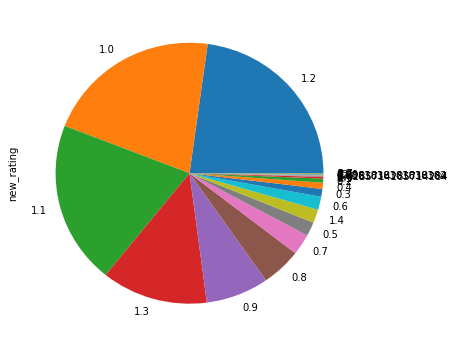

In [181]:
# Here we can see that most ratings fall between 1.0 and 1.3.
# Maybe we should consider exploring and removing the outliers? Are these mistakes?
import matplotlib.pyplot as plt
% matplotlib inline

all_tweets_df['new_rating'].value_counts().plot(kind='pie', figsize=(6,6))


In [182]:
# Create a DataFrame to explore the relationship between ratings and favorite count
most_ratings = all_tweets_df[all_tweets_df['new_rating']> .71]
most_ratings['new_rating'].count()

1804

In [183]:
all_ratings = all_tweets_df['new_rating'].count()
all_ratings


1971

In [184]:
most_ratings['new_rating'].count()/all_ratings

0.91527143581938097

In [185]:
#  # Investigate devices using groupby
device_df = all_tweets_df.groupby('device').tweet_id.count()
device_df

device
Client                        28
iPhone                      1932
rel="nofollow">TweetDeck      11
Name: tweet_id, dtype: int64

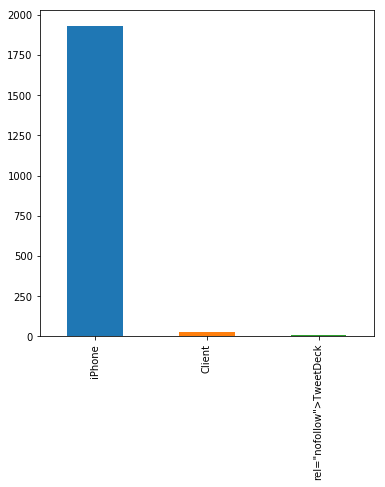

In [186]:
# Chart for devices
all_tweets_df['device'].value_counts().plot(kind='bar', figsize=(6,6))

In [187]:
all_tweets_df['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

### Report

Report on the data findings

The analysis shows that most tweets came from an iphone, with a count total of 1,932.  There were twenty-eight devices classified as a "client" and eleven as "tweet deck".  I looked at devices because I was wondering if the size of the viewing screen impacted the ratings, but it doesn't appear there was enough variety in device types to have an impact on ratings.

The bulk of the ratings, 91.52%, were above .71. I devided the numerator column by the denominator column, even though it had a unique structure where the numerators were larger than the denominators.  I would trim the rows with outlier ratings off of the rating data before using it in dog type comparisons.

The data could be used to determine which types of dogs appeared to have higher ratings, or were higher ratings correlated with retweet_count or favorite_count.  Dog types could be compared to favorite_count, and then again to retweet_count.  Also, there is a lot of missing doogo, floofer, pupper and puppo data.  How could I fill this in?  Where could I get the missing data.

Finally, you could see if dates, times or hashtags correlated with ratings, favorite_count, and retweet count.  The analysis could be used to determine the best time for WeRateDogs to tweet promotional tweets, in months, days, or times. What is #BarkWeek? When is #BarkWeek?  Is this prime promotion time for WeRateDogs?  


